# Algoritmo

En su curso, el profesor Misael utiliza la función ```ODE45``` que forma parte de Matlab, recibe como entradas la función a la derecha del igual, un valor inicial y el intervalo de integración. En Python, hay dos funciones que funcionan igual: ```scipy.integrate.RK23``` y ```scipy.integrate.RK45```, que utilizan el método de Runge-Kutta de orden $23$ y $45$ para resolver ecuaciones diferenciales ordinarias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45

# Problema 1

Se desea resolver el sistema de ecuaciones que describe un reactor de fermentación:

$$\frac{dx_{1}}{dt}=\left(\mu-D\right)x_{1}$$
$$\frac{dx_{2}}{dt}=D\left(x_{2,f}-x_{2}\right)-\frac{\mu x_{1}}{Y}$$

Donde:
- $\mu$ viene dado por: $$\mu=\frac{\mu_{\textrm{máx}}x_{2}}{k_{m}+x_{2}}$$
- $\mu_{\textrm{máx}}=0.53\textrm{ h r}^{-1}$
- $k_{m}=0.12\textrm{ g/L}$
- $Y=0.4$
- $x_{2,f}=4\textrm{ g/L}$
- $D=0.3\textrm{ h r}^{-1}$

Con condiciones iniciales $x_{1}(0)=0$ y $x_{2}(0)=4$. Se desea resolver para $0\leq t\leq 30$.

In [2]:
# Constantes
mumax=0.53
km=0.12
Y=0.4
x2f=4
D=0.3
h=0.1

In [3]:
# Condiciones iniciales
x10=1.
x20=1.

In [4]:
def f(t,x):
    return [((mumax*x[1]/(km+x[1])-D)*x[0]),(D*(x2f-x[1])-x[0]*(mumax*x[1]/(km+x[1]))/Y)]

In [5]:
t=np.arange(0,30+h,h)
x=np.array([x10,x20])

In [6]:
solución=RK45(f,t0=0,y0=x,t_bound=30,rtol=0.001,atol=1e-6,max_step=h)

In [7]:
# Recolección de datos
x1=np.zeros_like(t)
x2=np.zeros_like(t)
x1[0]=x10
x2[0]=x20
t_values=[]
for i in range(len(t)):
    # Se toma el paso y se extraen las solucione del paso
    solución.step()
    x1[i+1]=solución.y[0]
    x2[i+1]=solución.y[1]
    # se rompe el loop
    if solución.status == 'finished':
        break

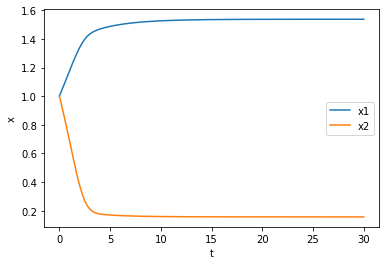

In [8]:
plt.plot(t,x1)
plt.plot(t,x2)
plt.xlabel("t")
plt.ylabel("x")
plt.legend(["x1","x2"])
plt.show()

# Problema 2

Ahora, se desea resolver el sistema de ecuaciones para un reactor Batch:

$$\frac{dA}{dt}=-R_{1}$$
$$\frac{dB}{dt}=-R_{1}-R_{2}$$
$$\frac{dC}{dt}=R_{1}-R_{2}$$
$$\frac{dD}{dt}=R_{2}$$

Donde $R_{1}=k_{1}AB-k_{1}'C$, $R_{2}=k_{2}BC$. Con $k_{1}=0.001$, $k_{1}'=0.015$ y $k_{2}=0.001$

In [9]:
A0=20.
B0=10.
C0=0.
D0=0.
T0=310
h=0.1

In [10]:
def g(t,y):
    k1=5e18*np.exp(-15e3/y[4])
    k11=75e18*np.exp(-15e3/y[4])
    k2=5e18*np.exp(-15e3/y[4])
    
    R1= k1*y[0]*y[1]-k11*y[2]
    R2= k2*y[1]*y[2]
    return np.asarray([-R1,-R1-R2,R1-R2,R2,10*(R1+R2)+300-y[4]])

In [11]:
t=np.arange(0,200+h,h)
A=np.zeros_like(t)
B=np.zeros_like(t)
C=np.zeros_like(t)
D=np.zeros_like(t)
T=np.zeros_like(t)
A[0]=A0
B[0]=B0
C[0]=C0
D[0]=D0
T[0]=T0
y=np.array([A0,B0,C0,D0,T0])

In [12]:
solución=RK45(g,t0=0,y0=y,t_bound=200,rtol=0.001,atol=1e-6,max_step=h)

In [13]:
# Recolección de datos
for i in range(len(t)):
    # Se toma el paso y se extraen las solucione del paso
    solución.step()
    A[i]=solución.y[0]
    B[i]=solución.y[1]
    C[i]=solución.y[2]
    D[i]=solución.y[3]
    T[i]=solución.y[4]
    # se rompe el loop
    if solución.status == 'finished':
        break

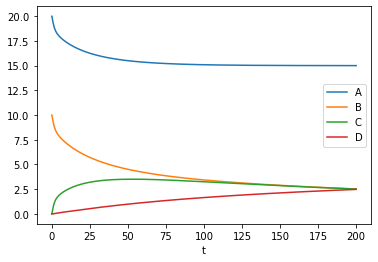

In [14]:
plt.plot(t,A)
plt.plot(t,B)
plt.plot(t,C)
plt.plot(t,D)
plt.legend(["A","B","C","D"])
plt.xlabel("t")
plt.show()

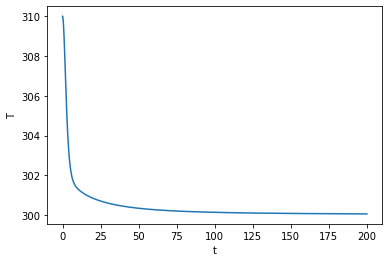

In [15]:
plt.plot(t,T)
plt.xlabel("t")
plt.ylabel("T")
plt.show()

In [16]:
C[np.where(t==200)]

array([2.51542314])

# Problema 3

Se desea resolver el sistema de ecuaciones:

$$\frac{dC_{A}}{dt}=-k_{1}C_{A}+k_{2}C_{B}$$
$$\frac{dC_{B}}{dt}=k_{1}C_{A}-k_{2}C_{B}$$

Con $C_{A}(0)=1\textrm{ g/mol}$, $C_{B}(0)=0\textrm{ g/mol}$, $k_{1}=1\textrm{ min}^{-1}$ y $k_{1}=0.5\textrm{ min}^{-1}$

In [17]:
k1=1
k2=0.5

In [18]:
def H(t,y):
    return np.asarray([-k1*y[0]+k2*y[1],k1*y[0]-k2*y[1]])

In [19]:
Ca0=1
Cb0=0

In [20]:
t=np.arange(0,10+h,h)
Ca=np.zeros_like(t)
Cb=np.zeros_like(t)
Ca[0]=Ca0
Cb[0]=Cb0
y=np.array([Ca0,Cb0])

In [21]:
solución=RK45(H,t0=0,y0=y,t_bound=10,rtol=0.001,atol=1e-6,max_step=h)

In [22]:
# Recolección de datos
for i in range(len(t)):
    # Se toma el paso y se extraen las solucione del paso
    solución.step()
    Ca[i]=solución.y[0]
    Cb[i]=solución.y[1]
    # se rompe el loop
    if solución.status == 'finished':
        break

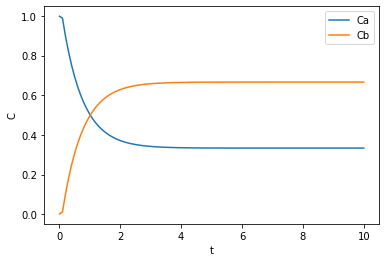

In [23]:
plt.plot(t,Ca)
plt.plot(t,Cb)
plt.xlabel("t")
plt.ylabel("C")
plt.legend(["Ca","Cb"])
plt.show()

In [24]:
Ca[np.where(t==10)],Cb[np.where(t==10)]

(array([0.33333357]), array([0.66666643]))